In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:


def create_histogram(image_path: str, num_bins: int = 16):

    # --- Load & convert image to grayscale ---
    img = Image.open(image_path).convert("L") 
    pixels = np.array(img).ravel()   

    hist, bin_edges = np.histogram(pixels, bins=num_bins, range=(0, 256))

    print("Histogram counts:", hist)
    print("Bin edges:", bin_edges)
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge", edgecolor="black")
    plt.title(f"Grayscale Histogram ({num_bins} bins)")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel count")
    plt.show()
    return hist, bin_edges



In [3]:
# level prob is the hist value normalized
def get_wk_from_level_prob(level_prob,k):
    return np.sum(level_prob[:k])

In [4]:
def get_u_k(level_prob,bin_level_average,k):
    return np.sum(bin_level_average[:k]*level_prob[:k])

In [5]:
def get_u_t(level_prob,bin_level_average):
    return np.sum(bin_level_average*level_prob)

In [6]:
def get_variance_b(u_t,u_k,w_k):
    return  (u_k - w_k*u_t)**2/(w_k*(1-w_k)+0.0001)

In [7]:

def blackout_below_threshold(img_path, threshold):
   
    img = Image.open(img_path).convert("L")          # 8-bit grayscale

    arr = np.array(img, dtype=np.uint8)
    arr[arr < threshold] = 0

    # --- to PIL image ---
    result = Image.fromarray(arr, mode="L")

    # --- save ---
    
    p = Path(img_path)
    out_path = str(p.with_name(p.stem + f"_blackout_t{threshold}").with_suffix(".png"))
    result.save(out_path)

    # --- display (original vs result) ---

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(np.array(Image.open(img_path).convert("L")), cmap="gray", vmin=0, vmax=255)
    axes[0].set_title("Original (Grayscale)")
    axes[0].axis("off")

    axes[1].imshow(arr, cmap="gray", vmin=0, vmax=255)
    axes[1].set_title(f"Blackout < {threshold}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

    return out_path, result

In [8]:
L=16

In [9]:
def otsu_algorithm(img_path,L):
    
    hist, bin_edges  = create_histogram(img_path,L)
    
    level_prob = hist/np.sum(hist)
    bin_level_average =  (bin_edges[:-1] + bin_edges[1:]) / 2


    max_variance_b = 0
    best_k = 0
    u_t = get_u_t(level_prob,bin_level_average)
    for i in range(L):
        u_k = get_u_k(level_prob,bin_level_average,i)
        w_k = get_wk_from_level_prob(level_prob,i)
        curr_variance_b = get_variance_b(u_t,u_k,w_k)
        if curr_variance_b > max_variance_b:
            max_variance_b = curr_variance_b
            best_k = i 
    bg_threshold = bin_level_average[best_k]
    return blackout_below_threshold(img_path, bg_threshold)




Histogram counts: [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   2   0   0
   1   0   0   0   0   0   0   2   0   0   1   0   0  10   0   0  27   0
   0 157   0   0 243   0   0 226   0   0 103   0   0   0 106   0   0 125
   0   0 112   0   0  94   0   0 142   0   0 247   0   0 365   0   0 240
   0   0   0 251   0   0 382   0   0 328   0   0 360   0   0 347   0   0
 352   0   0 379   0   0 351   0   0   0 285   0   0 301   0   0 283   0
   0 323   0   0 335   0   0 383   0   0 358   0   0 343   0   0   0 349
   0   0 376   0   0 296   0   0 345   0   0 354   0   0 375   0   0 324
   0   0 329   0   0   0 279   0   0 275   0   0 238   0   0 269   0   0
 243   0   0 286   0   0 267   0   0 261   0   0   0 286   0   0 320   0
   0 385   0   0 377   0   0 338   0   0 305   0   0 292   0   0 319   0
   0   0 339   0   0 310   0   0 294   0   0 268   0   0 264   0   0 228
   0   0 235   0   0 224   0   0   0 192   0   0 216   0   0 183   0   0
 203   0   0 250   0   0 221   0 

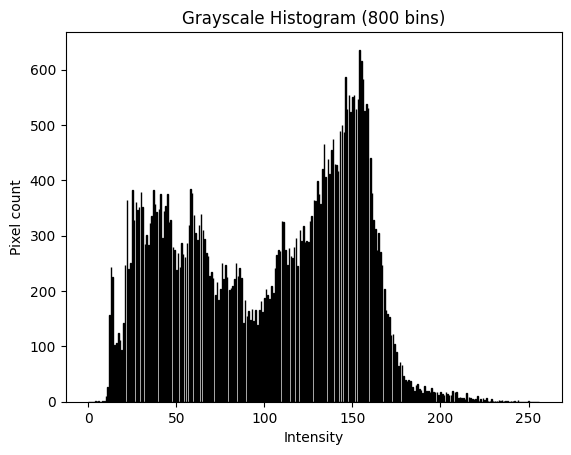

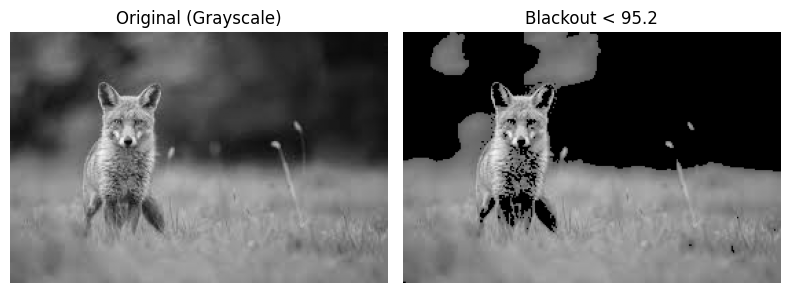

('test_1_blackout_t95.png', <PIL.Image.Image image mode=L size=275x183>)

In [10]:
otsu_algorithm("test_1.jpeg",800)

Histogram counts: [25279     0     0   178     0     0   320     0     0   649     0     0
  1039     0     0   895     0     0   728     0     0   963     0     0
     0   823     0     0   483     0     0   338     0     0   495     0
     0   302     0     0   400     0     0   516     0     0   306     0
     0     0   522     0     0   441     0     0   468     0     0   422
     0     0   698     0     0  1095     0     0  1086     0     0 67102
     0     0     0 78224     0     0 40834     0     0 21704     0     0
 26089     0     0 18050     0     0  6631     0     0  4161     0     0
  4979     0     0     0  4237     0     0  2690     0     0  2464     0
     0  2040     0     0  1987     0     0  1686     0     0  1542     0
     0  1388     0     0     0  1305     0     0  1277     0     0  1418
     0     0  1369     0     0  1487     0     0  1537     0     0  1568
     0     0  1770     0     0     0  1644     0     0  1662     0     0
  1693     0     0  1694     0   

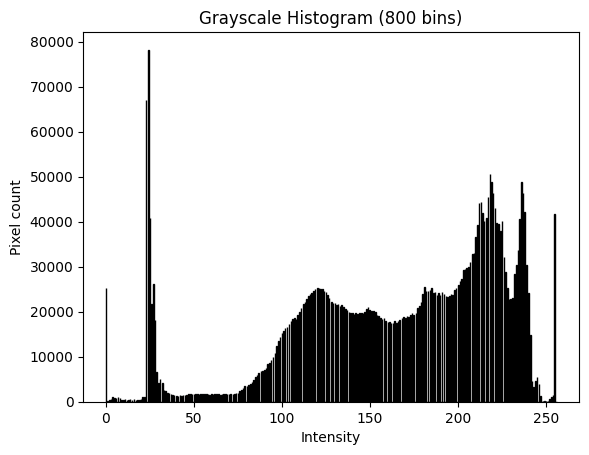

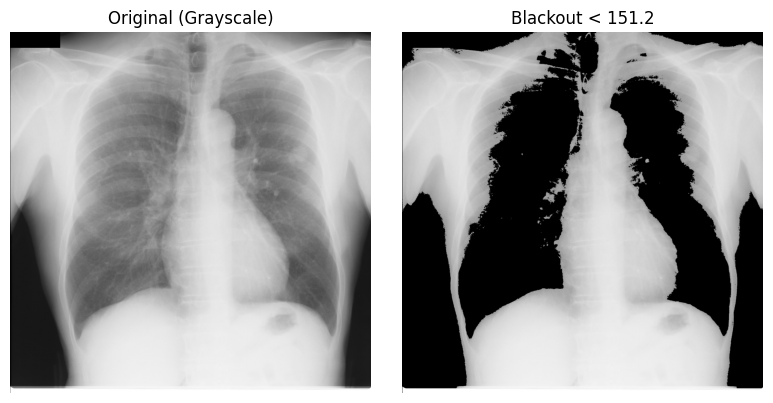

('JPCLN001_blackout_t151.png', <PIL.Image.Image image mode=L size=2048x2048>)

In [11]:
otsu_algorithm("JPCLN001.jpg",800)

Histogram counts: [1339    0    0 1043    0    0  673    0    0  525    0    0  842    0
    0  753    0    0  655    0    0  735    0    0    0  914    0    0
 1085    0    0 1043    0    0 1497    0    0 1368    0    0 1103    0
    0 1384    0    0 1093    0    0    0 1030    0    0  922    0    0
  872    0    0  810    0    0  869    0    0  904    0    0  792    0
    0  747    0    0    0  668    0    0  695    0    0  563    0    0
  637    0    0  505    0    0  526    0    0  574    0    0  547    0
    0    0  512    0    0  524    0    0  451    0    0  428    0    0
  526    0    0  437    0    0  360    0    0  296    0    0    0  305
    0    0  383    0    0  360    0    0  342    0    0  320    0    0
  348    0    0  335    0    0  334    0    0    0  302    0    0  307
    0    0  304    0    0  256    0    0  225    0    0  237    0    0
  200    0    0  209    0    0    0  203    0    0  202    0    0  178
    0    0  188    0    0  197    0    0  207    0    0  19

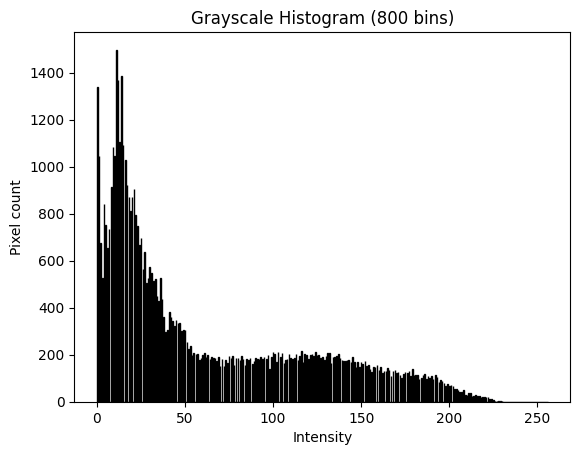

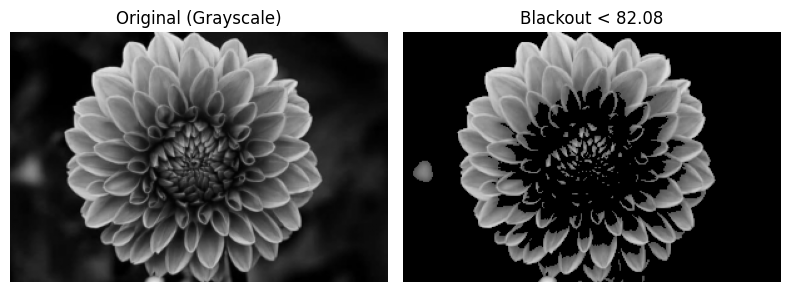

('unnamed_blackout_t82.png', <PIL.Image.Image image mode=L size=302x200>)

In [12]:
otsu_algorithm("unnamed.png",800)